## MI62

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
x = np.array([np.random.randint(0,9,30) for i in range(10000)])
y = []
for i in x:
    if np.sum(i) <100:
        y.append(0)
    else :
        y.append(1)
y = np.array(y)

x_empty, x_train, x_test = np.split(x,[0,8000], axis = 0)
y_empty, y_train, y_test = np.split(y, [0,8000], axis = 0)


x_train_dim = np.reshape(x_train,(8000,30,1))
x_test_dim = np.reshape(x_test,(2000,30,1))


In [4]:
model_cnn = keras.Sequential(
    [
        keras.layers.LSTM(200, activation= 'linear',batch_input_shape=(50,30,1)),
        keras.layers.Dense(1, activation = keras.activations.sigmoid), 
    ]
)

model_cnn.compile(loss = keras.losses.BinaryCrossentropy(), optimizer ='adam',metrics = ['accuracy'])
model_cnn_history = model_cnn.fit(x_train_dim,y_train,shuffle=True, batch_size = 50, epochs = 60,validation_data = (x_test_dim, y_test))

Epoch 1/60
160/160 [==============================] - 8s 43ms/step - loss: 0.1794 - accuracy: 0.9243 - val_loss: 0.1301 - val_accuracy: 0.9255
Epoch 2/60
160/160 [==============================] - 7s 43ms/step - loss: 0.1509 - accuracy: 0.9351 - val_loss: 0.1481 - val_accuracy: 0.9250
Epoch 3/60
160/160 [==============================] - 7s 45ms/step - loss: 0.1327 - accuracy: 0.9302 - val_loss: 0.1223 - val_accuracy: 0.9255
Epoch 4/60
160/160 [==============================] - 7s 41ms/step - loss: 0.1148 - accuracy: 0.9341 - val_loss: 0.1216 - val_accuracy: 0.9255
Epoch 5/60
160/160 [==============================] - 7s 41ms/step - loss: 0.1386 - accuracy: 0.9380 - val_loss: 0.1387 - val_accuracy: 0.9250
Epoch 6/60
160/160 [==============================] - 7s 41ms/step - loss: 0.1148 - accuracy: 0.9300 - val_loss: 0.1137 - val_accuracy: 0.9290
Epoch 7/60
160/160 [==============================] - 7s 43ms/step - loss: 0.0985 - accuracy: 0.9442 - val_loss: 0.0963 - val_accuracy: 0.9480

Epoch 58/60
160/160 [==============================] - 8s 50ms/step - loss: 0.0217 - accuracy: 0.9906 - val_loss: 0.0603 - val_accuracy: 0.9735
Epoch 59/60
160/160 [==============================] - 8s 49ms/step - loss: 0.0224 - accuracy: 0.9918 - val_loss: 0.0570 - val_accuracy: 0.9755
Epoch 60/60
160/160 [==============================] - 8s 51ms/step - loss: 0.0264 - accuracy: 0.9899 - val_loss: 0.0444 - val_accuracy: 0.9770


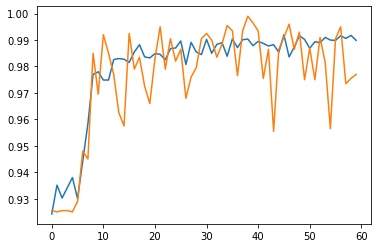

In [11]:
plt.plot(model_cnn_history.history['accuracy'])
plt.plot(model_cnn_history.history['val_accuracy'])
